<a href="https://colab.research.google.com/github/ivandenb/MAT-442-Fall-2024-/blob/main/HW3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3.3 Unconstrained Optimization**

3.3.1 Neccesary and local conditions of local minimizers

With a random function, we will find the local and global minimums and then plot the function to show the minimums

In [35]:
#imports

import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy.optimize import minimize

#define the function

def objective_function(x):
    return x**4 - x**3 - x**2 + x + 1

# How to find Global Minumum(help from internet)
bounds=np.array([[-2,2]])
xmin_global = optimize.differential_evolution(objective_function, bounds).x
print("Global Minimum found at:", xmin_global)



Global Minimum found at: [-0.6403882]


Using the first derivative and its zeros find the local minima

In [36]:

#define the derivative

def derivative(x):
    return 4*x**3 - 3*x**2 - 2*x + 1

# Find zeros of the derivative
zeros = optimize.fsolve(derivative, [-1, 0])
print("Zeros of the derivative: ", zeros)

Zeros of the derivative:  [-0.6403882  0.3903882]


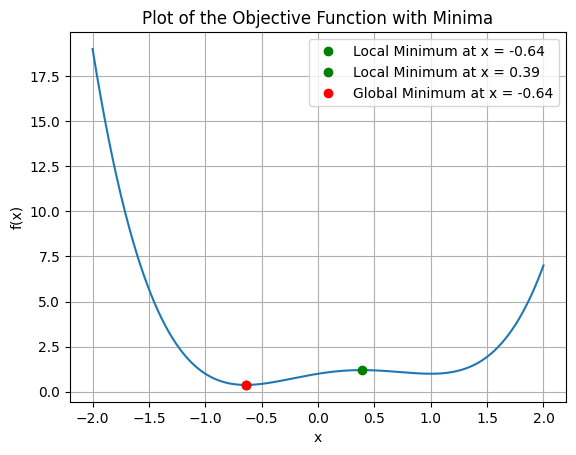

In [40]:

#Plot the function
x = np.linspace(-2, 2, 1000)
y = objective_function(x)

plt.plot(x, y)



# Label local minima
for zero in zeros:
    plt.plot(zero, objective_function(zero), 'go', label=f'Local Minimum at x = {zero:.2f}')
# Label the global minimum
plt.plot(xmin_global, objective_function(xmin_global), 'ro', label=f'Global Minimum at x = {xmin_global[0]:.2f}')


plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the Objective Function with Minima')
plt.legend()
plt.grid(True)
plt.show()

And thus the global minima and local minima are labeled

3.3.2 Convexity and Global Minimizers

Using the function above we will find the convexity of the function on different ranges

We will start by finding the second derivative

In [43]:

# Calculate the second derivative
def second_derivative(x):
    return 12*x**2 - 6*x - 2

# Analyze convexity
x_range = np.linspace(-2, 2, 1000)
second_deriv_values = second_derivative(x_range)

# Determine convexity based on the sign of the second derivative
convex_intervals = []
concave_intervals = []

#This long function here determines the values of the second derivative
#it then uses those values and when it changes across zero in order
#to get the intervals of the convexity
i = 0
while i < len(x_range) - 1:
    if second_deriv_values[i] >= 0 :
        start = x_range[i]
        while i < len(x_range) - 1 and second_deriv_values[i] >= 0 :
            i+=1
        end = x_range[i]
        convex_intervals.append((start,end))
    elif second_deriv_values[i] < 0:
        start = x_range[i]
        while i < len(x_range) - 1 and second_deriv_values[i] < 0:
            i+=1
        end = x_range[i]
        concave_intervals.append((start,end))
#This prints the intervals of convexity

print("Convex Intervals:", convex_intervals)
print("Concave Intervals:", concave_intervals)


Convex Intervals: [(-2.0, -0.22622622622622623), (0.7307307307307309, 2.0)]
Concave Intervals: [(-0.22622622622622623, 0.7307307307307309)]


And thus we have gotten the convexity of the graph given in the previous example

3.3.3 Gradient Descent

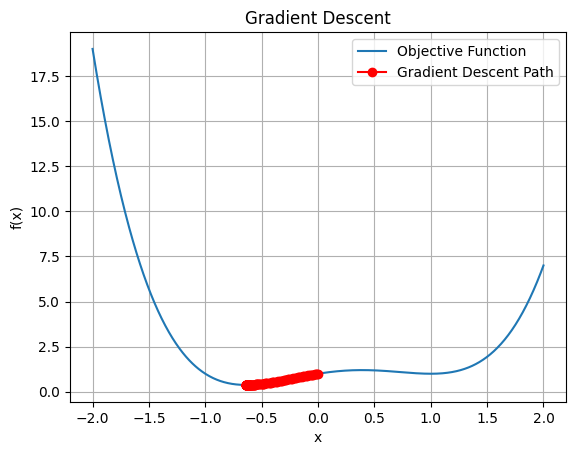

Local minimum found by gradient descent: -0.6389442138186945


In [49]:
# 3.3.3 How to find the Gradient descent of the previous function
def gradient_descent(objective_function, derivative, initial_guess, learning_rate, tolerance, max_iterations):
    x = initial_guess
    iterations = 0
    history = []
#Runs the gradient descent function until the mac iterations is reached
    while iterations < max_iterations:
        gradient = derivative(x)
        x_new = x - learning_rate * gradient
        history.append(x)

        if abs(objective_function(x_new) - objective_function(x)) < tolerance:
            break
        x = x_new
        iterations += 1

    return x, history

# Setting the parameters of the gradient descent function
initial_guess = 0
learning_rate = 0.01
tolerance = 1e-6
max_iterations = 1000


# Plot gradient descent
x_range = np.linspace(-2, 2, 1000)
y_values = objective_function(x_range)
plt.plot(x_range, y_values, label="Objective Function")
plt.plot(np.array(history_gd), objective_function(np.array(history_gd)), marker='o', linestyle='-', color='red', label="Gradient Descent Path")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()

#Find local minimum using gradient descent
local_min_gd, history_gd = gradient_descent(objective_function, derivative, initial_guess, learning_rate, tolerance, max_iterations)
print("Local minimum found by gradient descent:", local_min_gd)

And thus using gradient descent, we have also found the global minimum of the graph from the previous sections.